FIFA_data_pre2.csv EXIST.


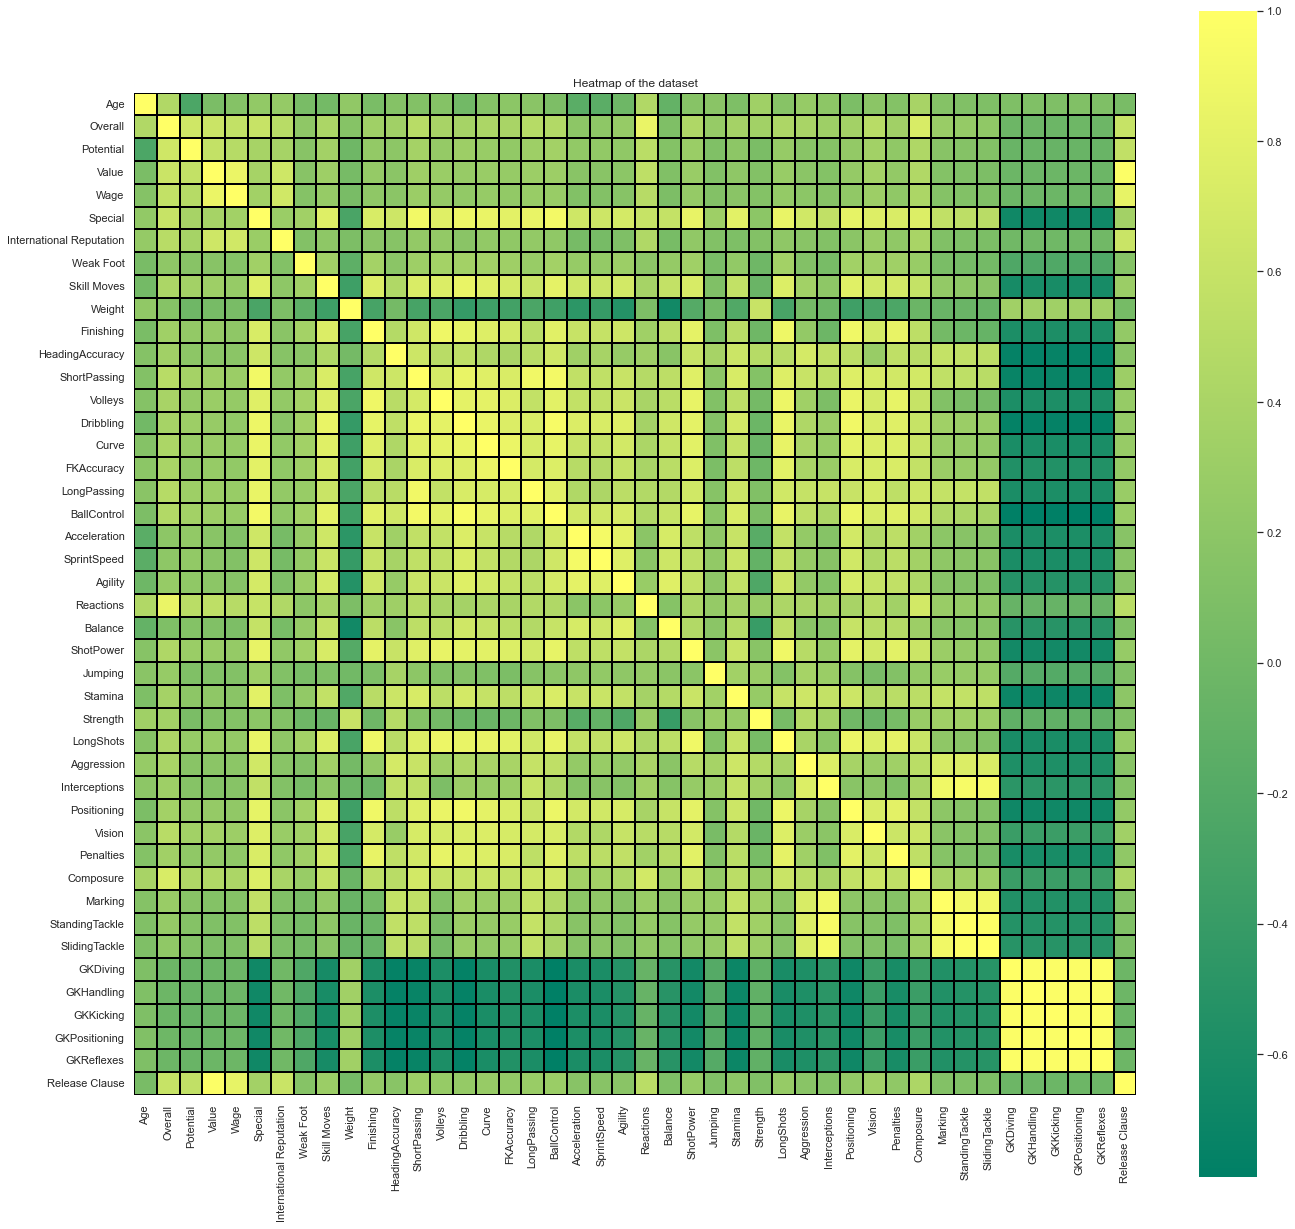

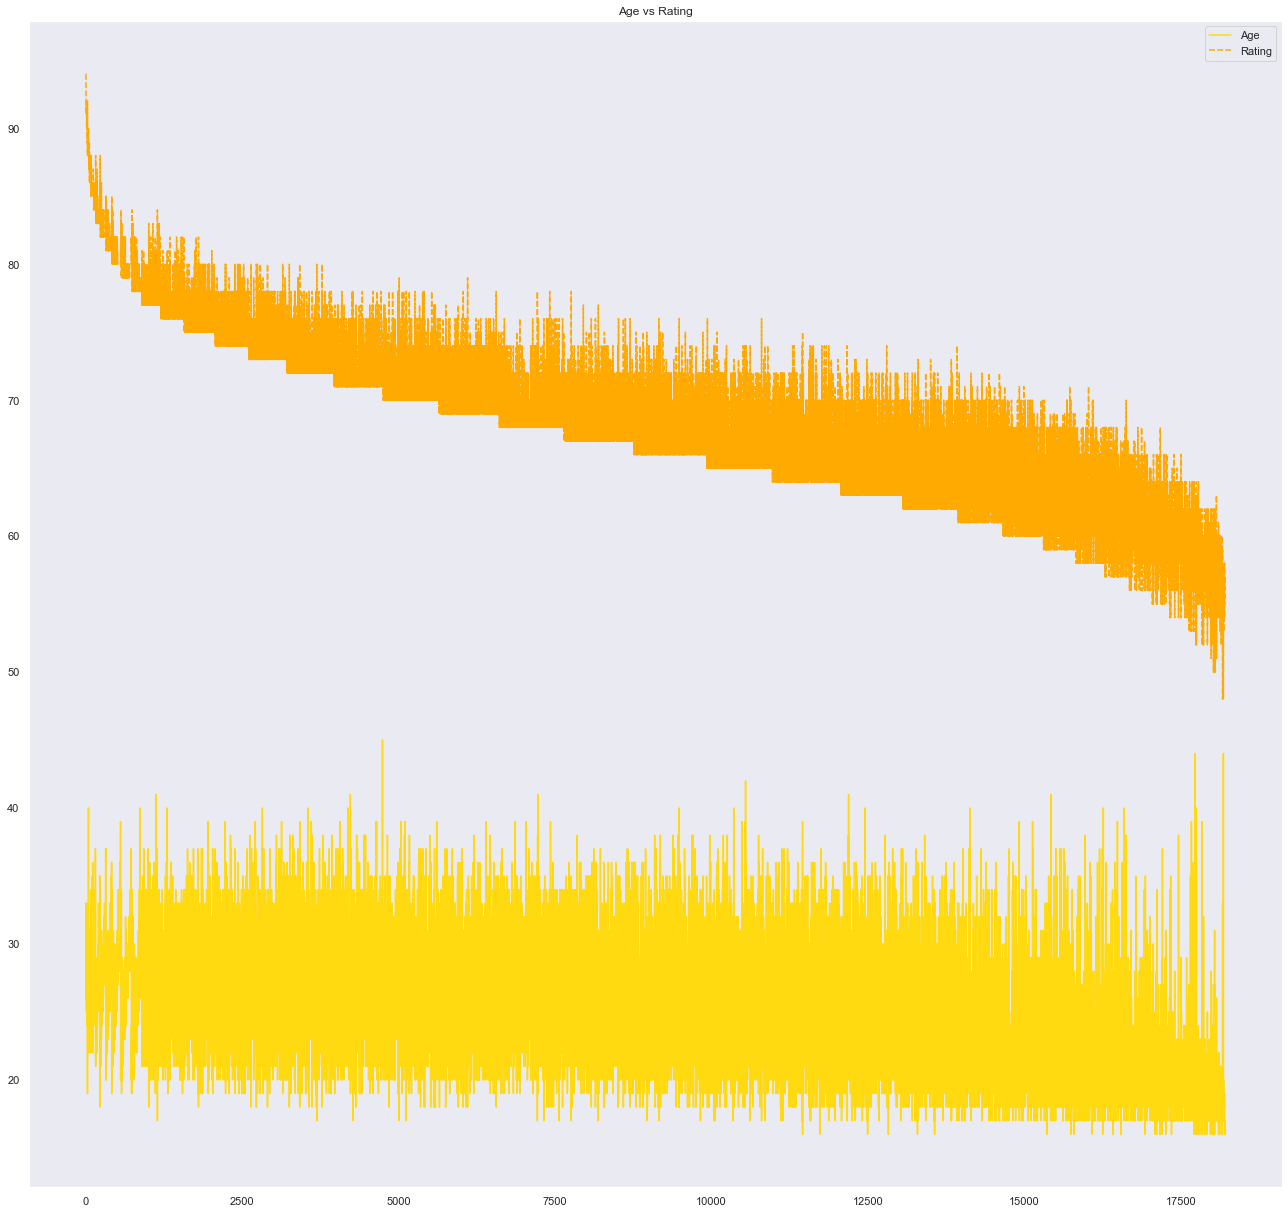

In [30]:
#AI-TECHGYM-2-10-Q
#特徴量エンジニアリング

# 実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_2\Answer_sheet\AI_Chapter2_saved_files")

#インポート
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#ファイルがなければ前の問題を実施する
title = "FIFA_data_pre2.csv"
if not os.path.exists(title):
    print("Run Previous problem.")
else :
    print(title + " EXIST.")
    df=pd.read_csv('./FIFA_data_pre2.csv')

#スタイル指定
plt.style.use('fivethirtyeight')
sns.set(style = "dark", palette = "colorblind", color_codes = True)
    
selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
#データフレーム
data_selected = pd.DataFrame(df, columns = selected_columns)

plt.figure(figsize=(20,20))
sns.heatmap(data_selected.corr(), linewidths=0.1, linecolor='black', square=True, cmap='summer')
plt.title('Heatmap of the dataset')
plt.show()

plt.figure(figsize=(20,20))
sns.lineplot(data=df[['Age', 'Rating']], palette='Wistia')
plt.title('Age vs Rating')
plt.show()

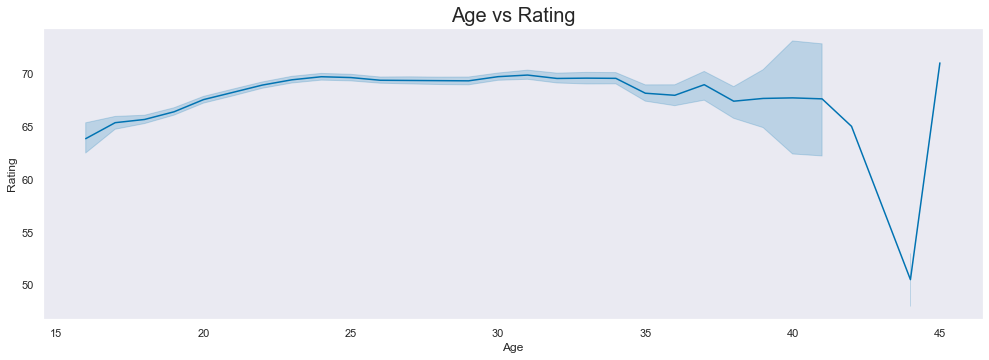

In [32]:
#年齢とレーティングの関係
plt.figure(figsize = (15,5))
sns.lineplot(data=df, x='Age', y='Rating', palette = 'Wistia')
plt.title('Age vs Rating', fontsize = 20)
plt.show()

C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


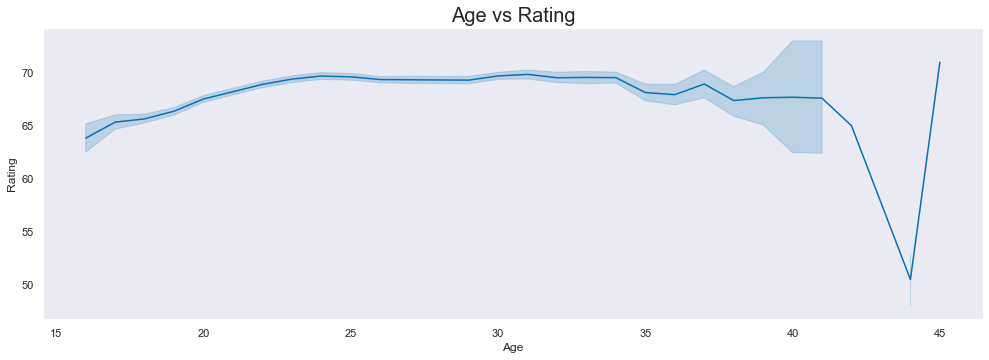

In [33]:
#年齢とレーティングの関係
plt.figure(figsize = (15,5))
sns.lineplot(df['Age'], df['Rating'], palette = 'Wistia')
plt.title('Age vs Rating', fontsize = 20)
plt.show()

In [26]:
data_selected.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [19]:
df['Wage_num'] = df['Wage'].apply(lambda x: x.strip('€K'))
df.query('Wage.str.endswith("K")', engine='python')

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Weight_num,Wage_num
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,29,89,71,87,91,74,94,88,159,565
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,27,88,73,81,91,83,94,88,183,405
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,28,85,72,80,94,69,92,84,150,290
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,16,26,43,39,66,54,92,21,168,260
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,59,79,81,92,81,76,92,85,154,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,...,45,39,46,43,55,54,56,37,134,1
18203,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,...,19,41,37,30,40,52,55,39,170,1
18204,18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,...,19,43,36,30,59,51,57,42,148,1
18205,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,...,24,44,38,39,48,50,56,45,154,1


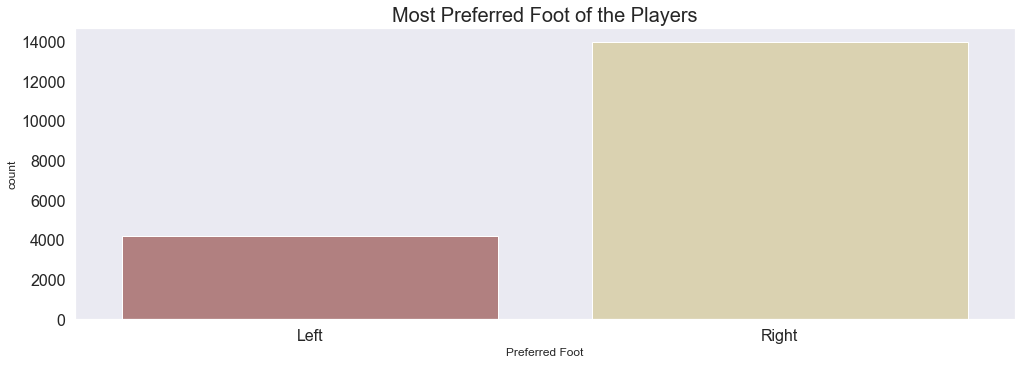

In [8]:
#利き足の数
plt.figure(figsize = (15, 5))
ax = sns.countplot(data=df, x='Preferred Foot', palette = 'pink')
ax.set_title('Most Preferred Foot of the Players', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

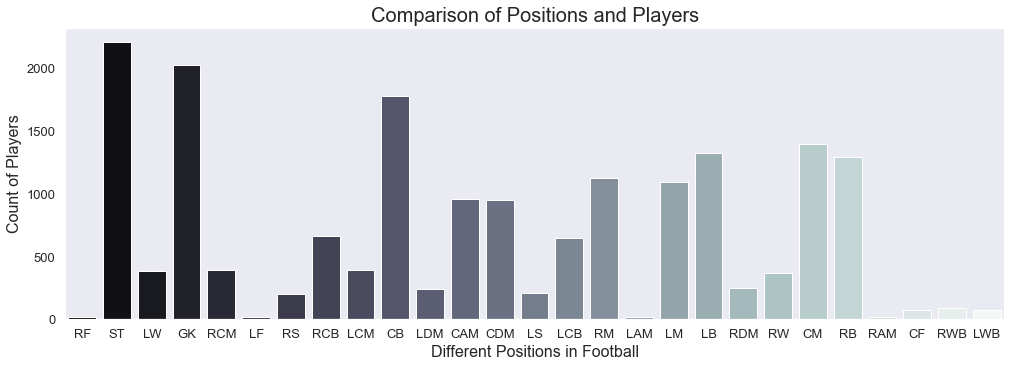

In [5]:
#ポジション分布
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = df, x='Position', palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.tick_params(labelsize = 13)
plt.show()

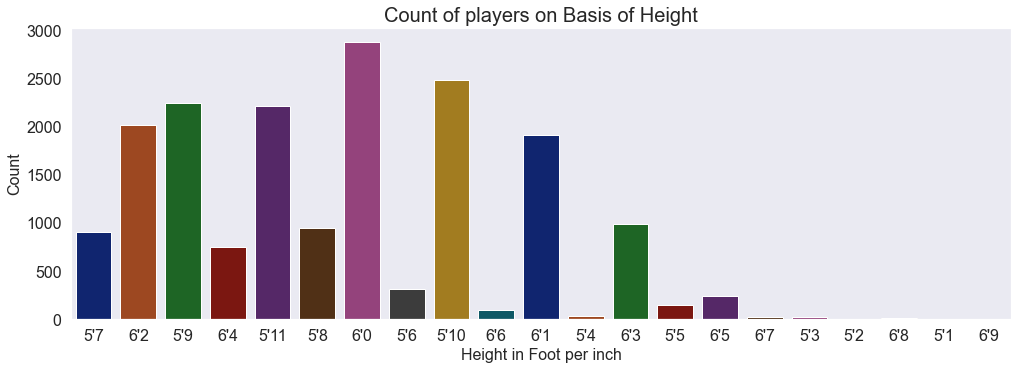

In [6]:
#背の高さ
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = df, x = 'Height', palette = 'dark')
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


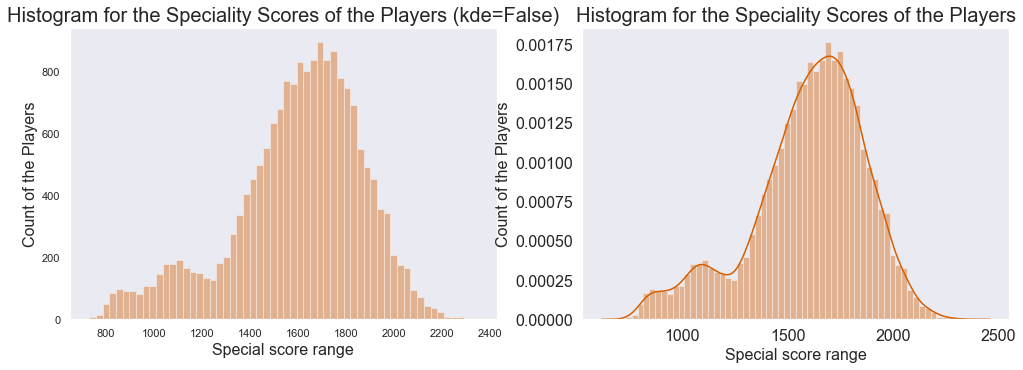

In [4]:
#特別なスコア
fig = plt.figure(figsize = (15, 5))
axes = fig.subplots(1,2)
sns.distplot(df['Special'], bins = 58, kde = False, color = 'r', ax=axes[0])
axes[0].set_xlabel(xlabel = 'Special score range', fontsize = 16)
axes[0].set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
axes[0].set_title(label = 'Histogram for the Speciality Scores of the Players (kde=False)', fontsize = 20)
sns.distplot(df['Special'], bins = 58, color = 'r', ax=axes[1])
axes[1].set_xlabel(xlabel = 'Special score range', fontsize = 16)
axes[1].set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
axes[1].set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


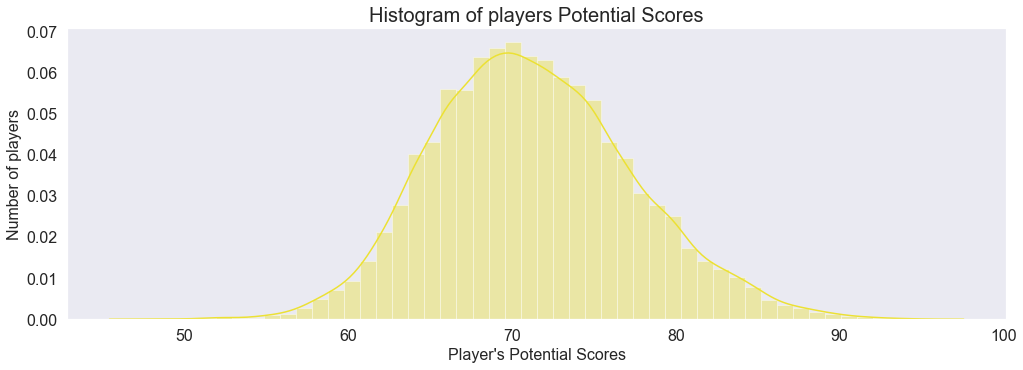

In [27]:
#ポテンシャル
plt.figure(figsize = (15, 5))
ax = sns.distplot(df['Potential'], bins = 48, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()


C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


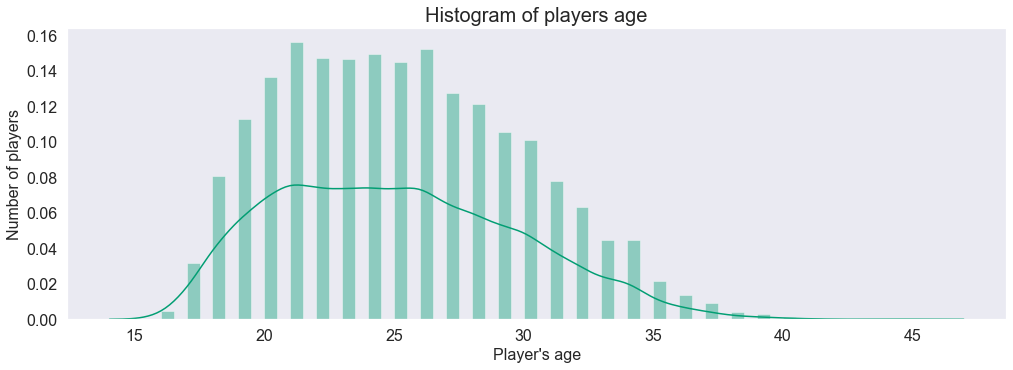

In [28]:
#年齢
plt.figure(figsize = (15, 5))
ax = sns.distplot(df['Age'], bins = 58, kde = True, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

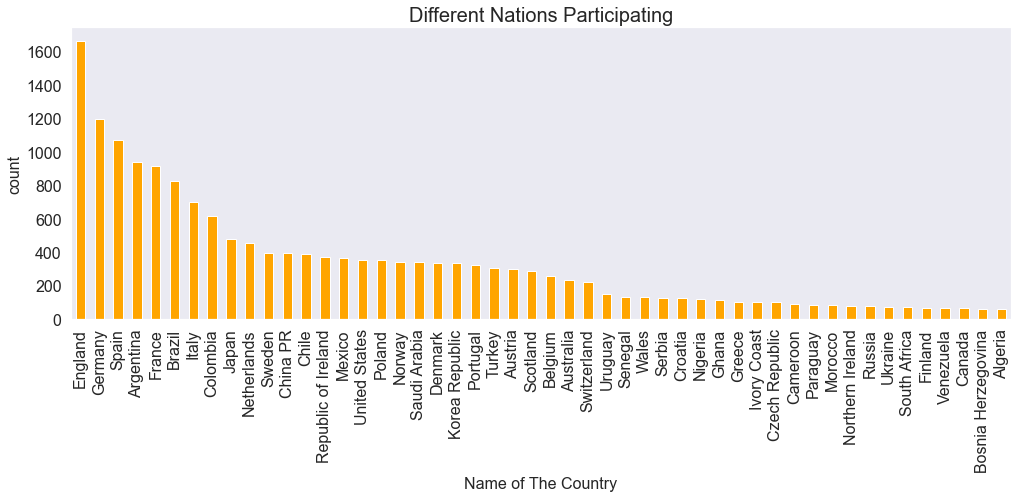

In [31]:
#国別のプレイヤーの数
df['Nationality'].value_counts().head(50).plot.bar(color = 'orange', figsize = (15, 5))
plt.title('Different Nations Participating', fontsize = 20, fontweight = 20)
plt.xlabel('Name of The Country',fontsize = 16)
plt.ylabel('count',fontsize = 16)
plt.tick_params(labelsize = 16)
plt.show()

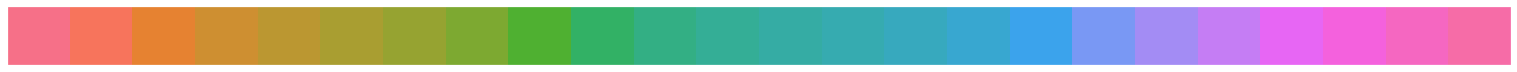

In [10]:
sns.palplot(sns.color_palette("husl",24))

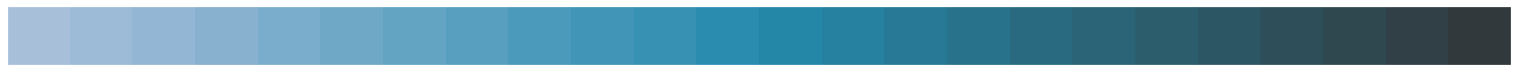

In [11]:
sns.palplot(sns.color_palette("PuBuGn_d",24))

In [13]:
from ipywidgets import interact, FloatSlider
def show_pal0(palette):
    sns.palplot(sns.color_palette(palette, 24))
interact(show_pal0, palette='deep muted pastel bright dark colorblind'.split());

interactive(children=(Dropdown(description='palette', options=('deep', 'muted', 'pastel', 'bright', 'dark', 'c…

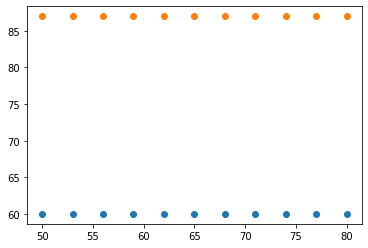

In [33]:
x3 = [50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]
y3 = [ 60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.]

x4 = [50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]
y4 = [ 87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.]

plt.scatter(x3, y3)
plt.scatter(x4, y4)
plt.show()

In [6]:
df_c

,0_Java,0_JavaScript,0_PHP,0_Python,0_Ruby
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [7]:
df_d

,0_Python,0_Ruby,0_PHP,0_Java,0_JavaScript
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [10]:
values

array(['Python', 'Ruby', 'PHP', 'Java', 'JavaScript'], dtype=object)